<a href="https://colab.research.google.com/github/marcelodepaoli/Controle/blob/main/7_Erro_em_regime_permanente_Exemplo_2_(degrau).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install control

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.1/455.1 kB 6.7 MB/s eta 0:00:00


In [ ]:
import control as ctl
import matplotlib.pyplot as plt
import numpy as np
import sympy

G(s) = 
6 s + 1.5
---------
s^2 + 2 s

T(s) = 
   6 s^3 + 13.5 s^2 + 3 s
-----------------------------
s^4 + 10 s^3 + 17.5 s^2 + 3 s

Erro em regime permanente: 0


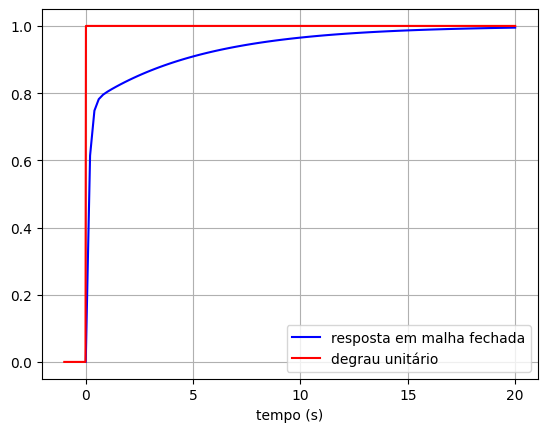

In [ ]:
#FTMA
s = ctl.TransferFunction.s

J_s = 2+0.5/s
H_s = 3/(s+2)
G_s = J_s*H_s
print(f"G(s) = {G_s}")

#FTMF
T_s = G_s/(1+G_s)
print(f"T(s) = {T_s}")

# Tempo de simulação
Tsim = 20

# Resposta ao degrau unitário
T_mf, yout_mf = ctl.step_response(T_s, Tsim)

# Degrau unitário (para ficar bonito no gráfico)
T_degrau = np.linspace(-1, Tsim, 1000)
y_degrau = np.ones_like(T_degrau)
y_degrau[T_degrau < 0] = 0

# Plota os resultados
plt.plot(T_mf, yout_mf, 'b-')
plt.plot(T_degrau, y_degrau, 'r-')
plt.xlabel('tempo (s)')
plt.legend(['resposta em malha fechada', 'degrau unitário'])
plt.grid()

# Erro em regime permanente de MF a partir da FTMA G(s)
s_ = sympy.symbols("s_")

J_s_ = 2+0.5/s_
H_s_ = 3/(s_+2)
G_s_ = J_s_*H_s_
R_s_ = 1/s_

erro_inf = sympy.limit(s_*R_s_/(1+G_s_), s_, 0)
print(f"Erro em regime permanente: {erro_inf}")